<a href="https://colab.research.google.com/github/Rezamoghadam8810/Algorithmic_trading_tutorial/blob/main/Annualizing_Mean_return_and_std_of_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [4]:
msft=pd.read_csv("/content/msft.csv",index_col='Date',parse_dates=['Date'])

In [5]:
msft

,Price,Returns
Date,,
2014-10-01,39.088596,NaN
2014-10-02,38.969368,-0.003050
2014-10-03,39.250412,0.007212
2014-10-06,39.250412,0.000000
2014-10-07,38.773510,-0.012150
...,...,...
2021-05-24,243.040466,0.022882
2021-05-25,243.951492,0.003748
2021-05-26,243.728592,-0.000914


In [6]:
msft['log_ret']=np.log(msft.Price / msft.Price.shift(1))
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,39.088596,NaN,NaN
2014-10-02,38.969368,-0.003050,-0.003055
2014-10-03,39.250412,0.007212,0.007186
2014-10-06,39.250412,0.000000,0.000000
2014-10-07,38.773510,-0.012150,-0.012225
...,...,...,...
2021-05-24,243.040466,0.022882,0.022624
2021-05-25,243.951492,0.003748,0.003741
2021-05-26,243.728592,-0.000914,-0.000914


In [7]:
msft.log_ret.agg(["mean","std"])  # mean and std based on daily returns

,log_ret
mean,0.001088
std,0.017233


In [8]:
ann_mu=msft.log_ret.mean() * 252 # annualized mean return

In [9]:
cagr = np.exp(ann_mu) - 1 # dont mix up with cagr
cagr

np.float64(0.3153500602153456)

In [10]:
ann_std = msft.log_ret.std() * np.sqrt(252) # annualized std of returns (ALT 1)
ann_std

np.float64(0.2735617960254355)

In [11]:
ann_std = np.sqrt(msft.log_ret.var() * 252) # annualized std of returns (ALT 2)
ann_std

np.float64(0.2735617960254355)

**Resampling / smooting**

In [12]:
msft.head(25)

,Price,Returns,log_ret
Date,,,
2014-10-01,39.088596,NaN,NaN
2014-10-02,38.969368,-0.003050,-0.003055
2014-10-03,39.250412,0.007212,0.007186
2014-10-06,39.250412,0.000000,0.000000
2014-10-07,38.773510,-0.012150,-0.012225
2014-10-08,39.838009,0.027454,0.027084
2014-10-09,39.046021,-0.019880,-0.020080
2014-10-10,37.496094,-0.039695,-0.040504
2014-10-13,37.172485,-0.008630,-0.008668


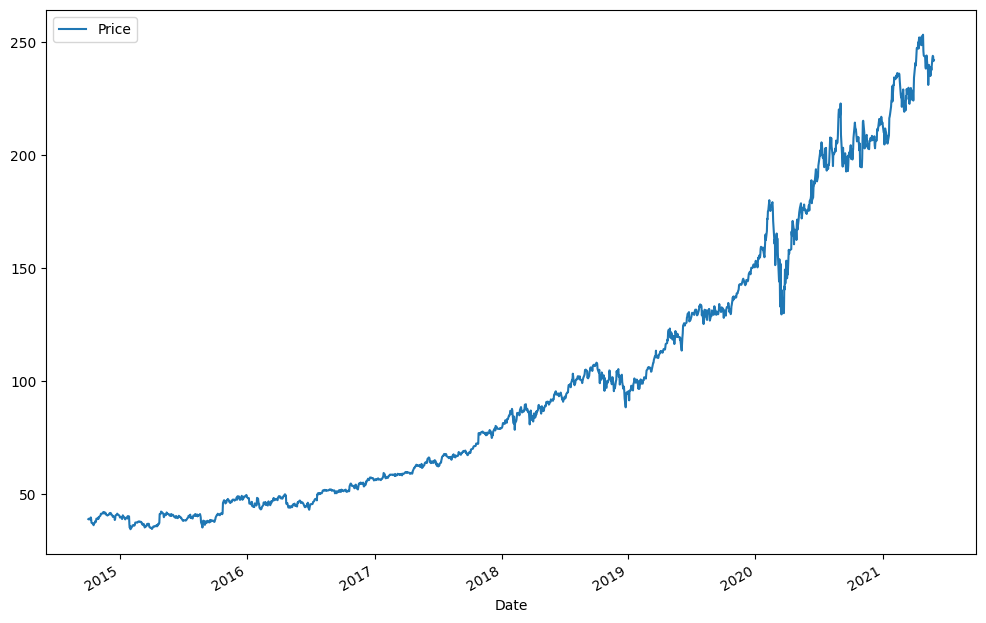

In [13]:
msft.Price.plot(figsize=(12,8))
plt.legend()
plt.show()

In [14]:
monthly = msft.Price.resample("M").last() ## resample to monthly (mont end)
monthly

<ipython-input-14-e5adb0977c0d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = msft.Price.resample("M").last() ## resample to monthly (mont end)


,Price
Date,
2014-10-31,39.982784
2014-11-30,40.971954
2014-12-31,39.806458
2015-01-31,34.621780
2015-02-28,37.845757
...,...
2021-01-31,223.768051
2021-02-28,224.689560
2021-03-31,227.967346


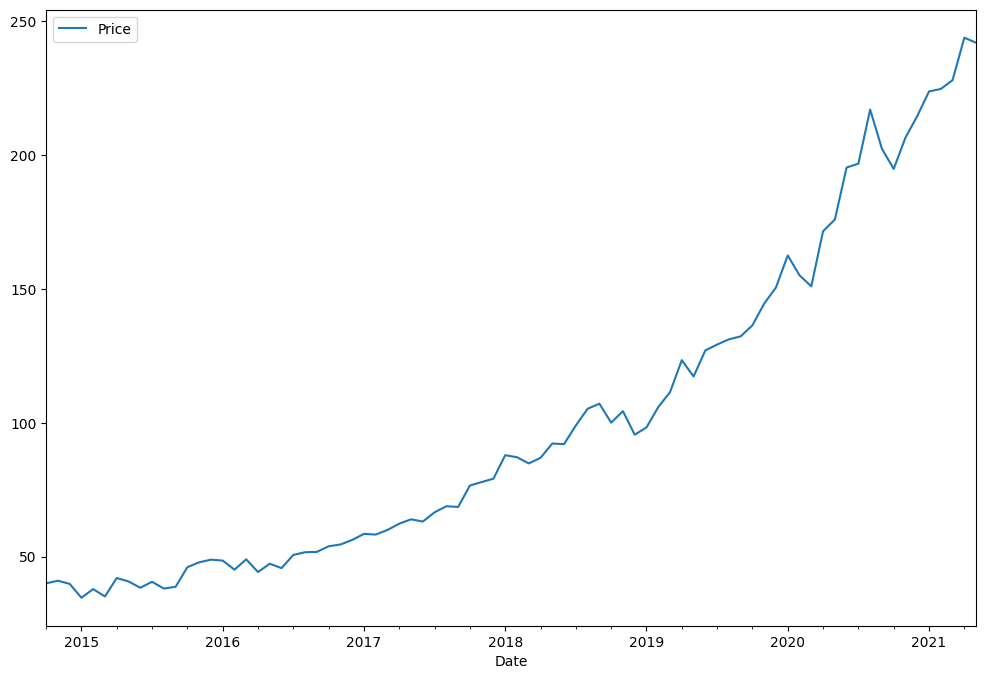

In [17]:
monthly.plot(figsize=(12,8))
plt.legend()
plt.show()

In [18]:
freqs = ["A","Q","M","W-Fri","D"]
periods = [1,4,12,52,252]
ann_mean=[]
ann_std=[]

In [19]:
for i in range(5):
  resamp=msft.Price.resample(freqs[i]).last() # resample
  ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i]) # calc annualized mean
  ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc annualized std

<ipython-input-19-5fbc406cfbb0>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  resamp=msft.Price.resample(freqs[i]).last() # resample
<ipython-input-19-5fbc406cfbb0>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resamp=msft.Price.resample(freqs[i]).last() # resample
<ipython-input-19-5fbc406cfbb0>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resamp=msft.Price.resample(freqs[i]).last() # resample


In [20]:
ann_mean

[np.float64(0.25782900310792733),
 np.float64(0.27766200334699864),
 np.float64(0.2734759293979984),
 np.float64(0.27256844937065594),
 np.float64(0.274986771957588)]

In [21]:
ann_std

[np.float64(0.12609167212161076),
 np.float64(0.1785613286483248),
 np.float64(0.20430364235696413),
 np.float64(0.23019029510545985),
 np.float64(0.266987122012738)]

In [22]:
summary = pd.DataFrame(data = {"ann_std":ann_std,"ann_mean":ann_mean},index=freqs)
summary

,ann_std,ann_mean
A,0.126092,0.257829
Q,0.178561,0.277662
M,0.204304,0.273476
W-Fri,0.230190,0.272568
D,0.266987,0.274987


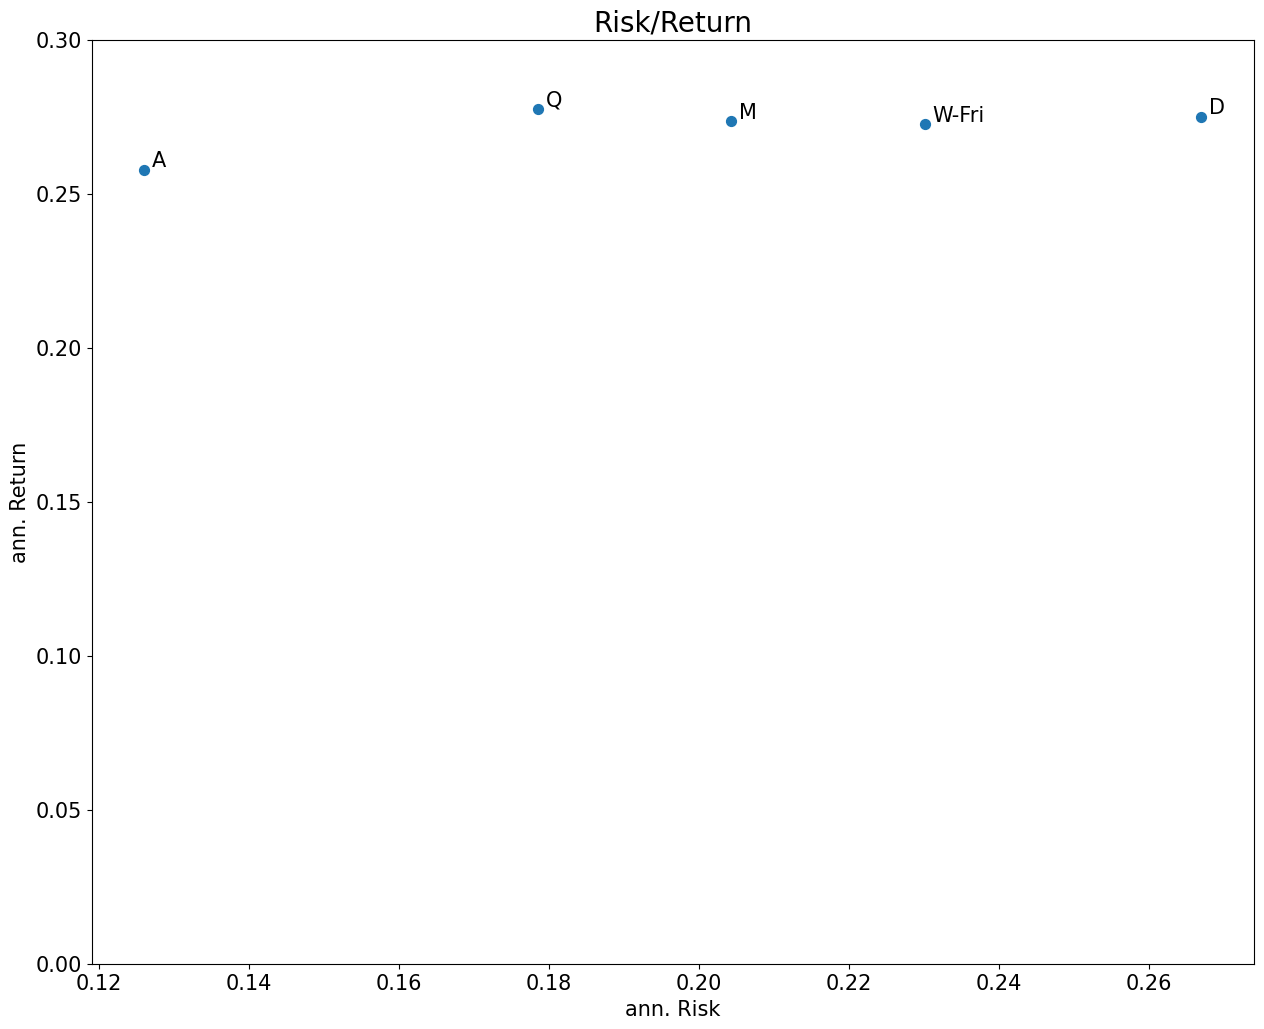

In [24]:
summary.plot(kind="scatter",x="ann_std",y="ann_mean",figsize=(15,12),s=50,fontsize = 15)
for i in summary.index:
  plt.annotate(i,xy=(summary.loc[i,"ann_std"]+0.001,summary.loc[i,"ann_mean"]+0.001),size=15)
plt.ylim(0,0.3)
plt.xlabel("ann. Risk",fontsize=15)
plt.ylabel("ann. Return",fontsize=15)
plt.title("Risk/Return",fontsize=20)
plt.show()